In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import glob
import openpyxl
from sklearn.model_selection import train_test_split
import warnings
import logging
warnings.filterwarnings("ignore")
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [2]:
pwd = os.getcwd()
covid=os.path.join(pwd,"dataset/COVID-19_Radiography_Dataset/COVID.metadata.xlsx").replace("\\", "/")
opacity=os.path.join(pwd,"dataset/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx").replace("\\", "/")
normal=os.path.join(pwd,"dataset/COVID-19_Radiography_Dataset/Normal.metadata.xlsx").replace("\\", "/")
pneumonia=os.path.join(pwd,"dataset/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx").replace("\\", "/")

In [3]:
covid_img=pd.read_excel(covid)
covid_img.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [4]:
opacity_images=pd.read_excel(opacity)
opacity_images.head()

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [5]:
normal_images=pd.read_excel(normal)
normal_images.head()

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [6]:
pneumonia_images=pd.read_excel(pneumonia)
pneumonia_images.head()

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [7]:
root_dir=os.path.join(pwd,"dataset/COVID-19_Radiography_Dataset/").replace("\\", "/")
imgs=['COVID','Lung_Opacity','Normal','Viral_Pneumonia']
new_dir=os.path.join(pwd,"dataset/all_images/").replace("\\", "/")

In [8]:
if not os.path.exists(new_dir):
    os.mkdir(new_dir)
    
    for i in imgs:
        org_dir=os.path.join(root_dir,i+"")
        for imgfile in glob.iglob(os.path.join(org_dir,"*.png")):
            shutil.copy(imgfile,new_dir)
else:
    print("Already Exist")

Already Exist


In [9]:
counter = {'COVID': 0, 'Lung_Opacity': 0, 'Normal': 0, 'Viral Pneumonia': 0}

for image_category in counter:
    for image_path in glob.iglob(new_dir + "*" + image_category + "*"):
        counter[image_category] += 1
counter

{'COVID': 8, 'Lung_Opacity': 6012, 'Normal': 5492, 'Viral Pneumonia': 1345}

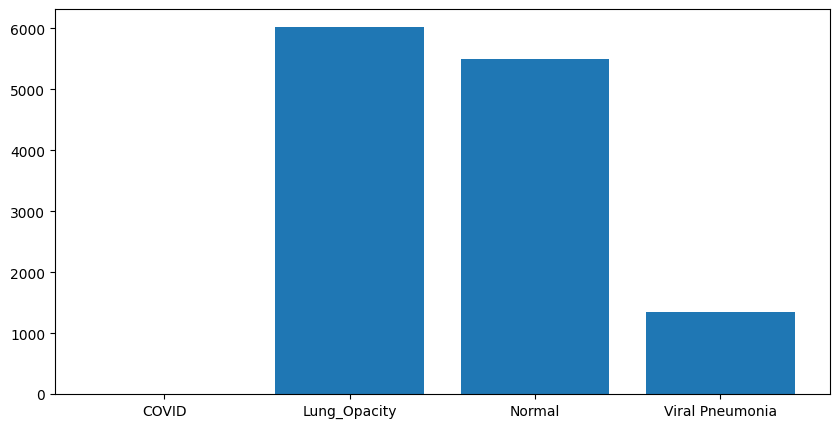

In [10]:
plt.figure(figsize=(10,5))
plt.bar(x=counter.keys(), height=counter.values())
plt.show()

In [11]:
if not os.path.exists(new_dir + "train_test_split/"):
    os.makedirs(new_dir + "train_test_split/")
    os.makedirs(new_dir + "train_test_split/train/Normal")
    os.makedirs(new_dir + "train_test_split/train/Covid")
    os.makedirs(new_dir + "train_test_split/test/Normal")
    os.makedirs(new_dir + "train_test_split/test/Covid")
    os.makedirs(new_dir + "train_test_split/validation/Normal")
    os.makedirs(new_dir + "train_test_split/validation/Covid")
    for i in np.random.choice(replace=False, size=3000, a=glob.glob(new_dir + imgs[0] + "*")):
        shutil.copy(i, new_dir + "train_test_split/train/Covid")
        os.remove(i)
    for i in np.random.choice(replace=False, size=3900, a=glob.glob(new_dir + imgs[2] + "*")):
        shutil.copy(i, new_dir + "train_test_split/train/Normal")
        os.remove(i)  
   
    for i in np.random.choice(replace=False, size=308, a=glob.glob(new_dir + imgs[0] + "*")):
        shutil.copy(i, new_dir + "train_test_split/validation/Covid")
        os.remove(i)
    for i in np.random.choice(replace=False, size=500, a=glob.glob(new_dir + imgs[2] + "*")):
        shutil.copy(i, new_dir + "train_test_split/validation/Normal")
        os.remove(i)
     
    for i in np.random.choice(replace=False, size=300, a=glob.glob(new_dir + imgs[0] + "*")):
        shutil.copy(i, new_dir + "train_test_split/test/Covid")
        os.remove(i)
    for i in np.random.choice(replace=False, size=300, a=glob.glob(new_dir + imgs[2] + "*")):
        shutil.copy(i, new_dir + "train_test_split/test/Normal")
        os.remove(i)  


In [12]:
train_path=os.path.join(pwd,"dataset/all_images/train_test_split/train").replace("\\", "/")
test_path=os.path.join(pwd,"dataset/all_images/train_test_split/test").replace("\\", "/")
valid_path=os.path.join(pwd,"dataset/all_images/train_test_split/validation").replace("\\", "/")

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow import keras
import tensorflow as tf

# Suppress deprecation warnings
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Modify the code to replace the deprecated loss function
loss_function = tf.compat.v1.losses.sparse_softmax_cross_entropy


In [21]:
train_data_gen=ImageDataGenerator(zoom_range=0.2,horizontal_flip=True,shear_range=0.2,rescale=1./255)
train=train_data_gen.flow_from_directory(directory=train_path,target_size=(224,224),batch_size=32,class_mode="binary")

Found 6900 images belonging to 2 classes.


In [22]:
validation_data_gen=ImageDataGenerator(rescale=1./255)
validation=validation_data_gen.flow_from_directory(directory=valid_path,target_size=(224,224),batch_size=32,class_mode="binary")

Found 808 images belonging to 2 classes.


In [23]:
test_data_gen=ImageDataGenerator(rescale=1./255)
test=test_data_gen.flow_from_directory(directory=test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode="binary")

Found 600 images belonging to 2 classes.


In [24]:
class_type={0:'Covid',1:'Normal'}

In [25]:
t_img,label=train.next()

In [26]:
t_img.shape,label.shape

((32, 224, 224, 3), (32,))

In [27]:
label[0]

1.0

In [28]:
def plotImage(img_arr,label):
    for im, l in zip(img_arr,label):
        plt.figure(figsize=(5,5))
        plt.imshow(im,cmap='gray')
        plt.title(class_type[int(1)])
        plt.axis=False
        plt.show()

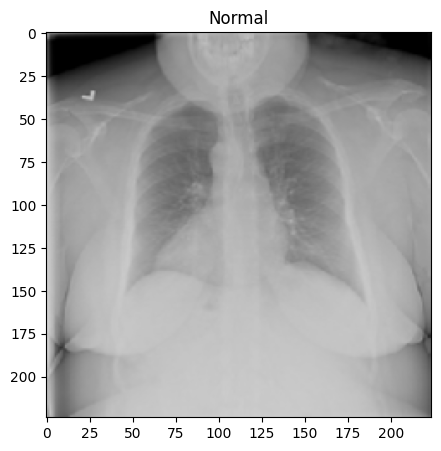

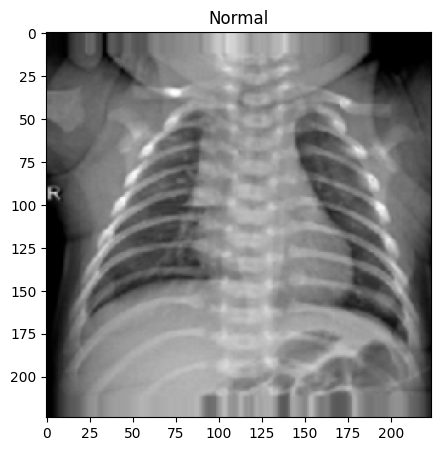

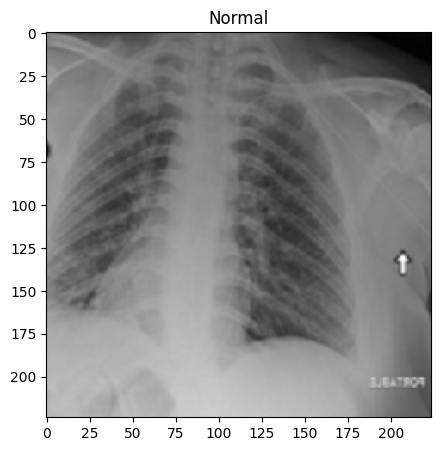

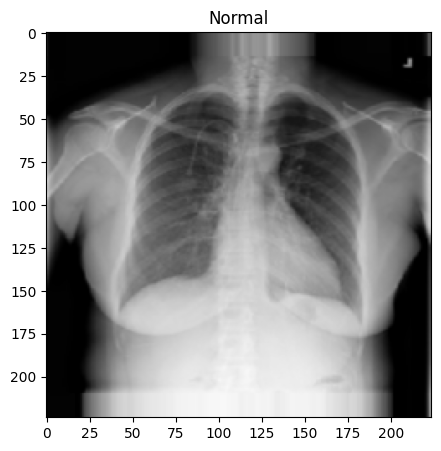

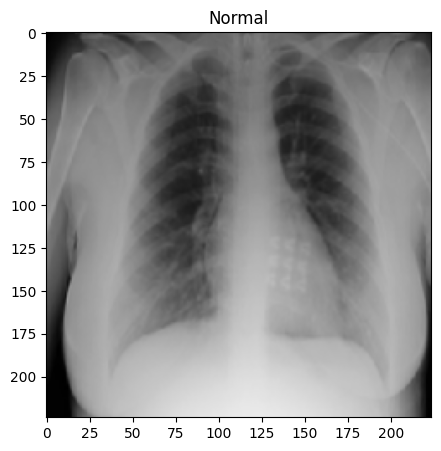

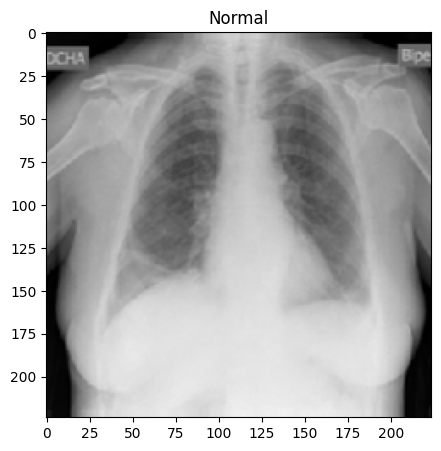

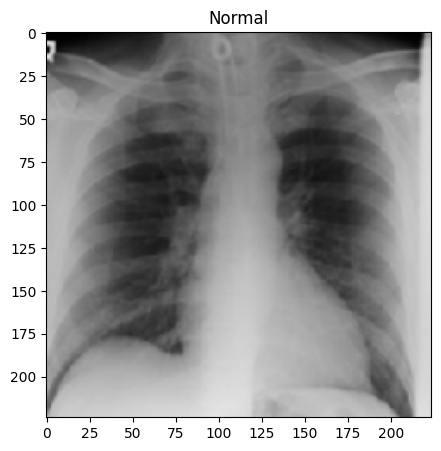

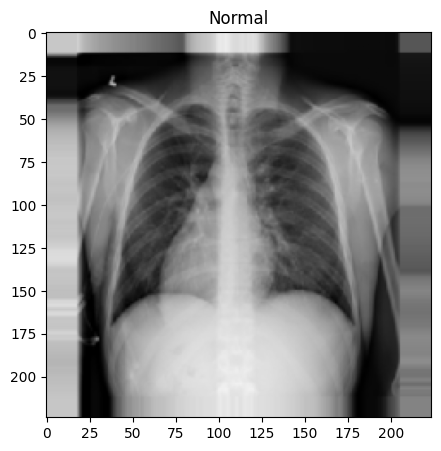

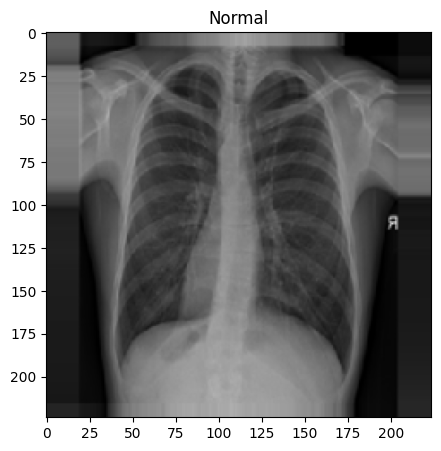

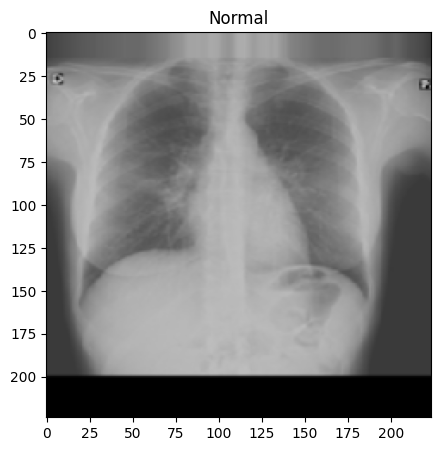

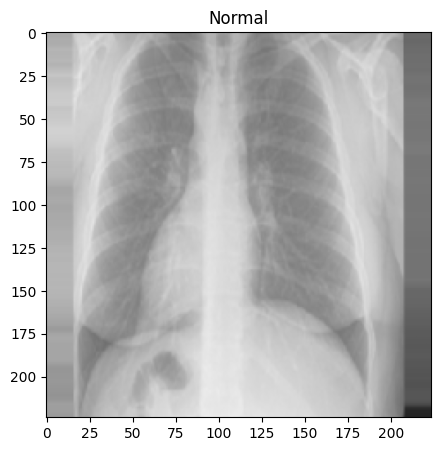

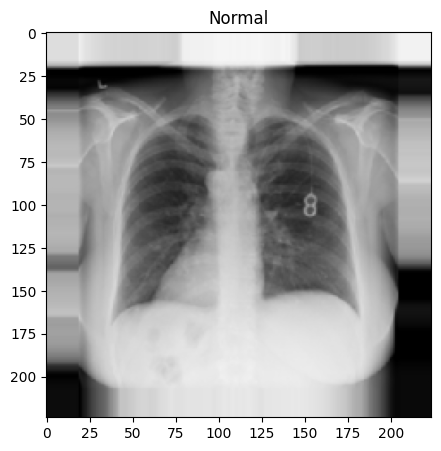

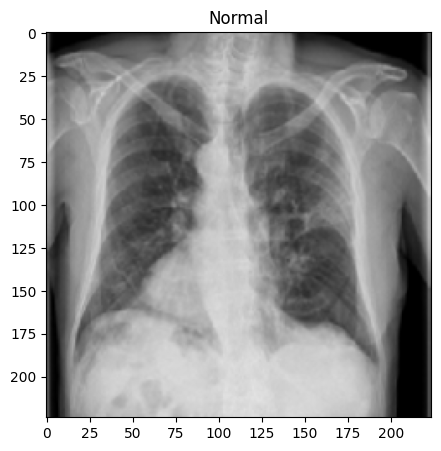

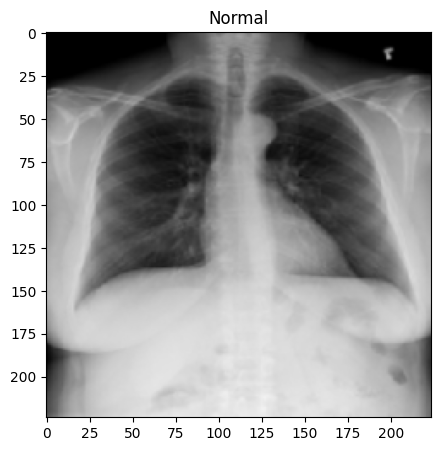

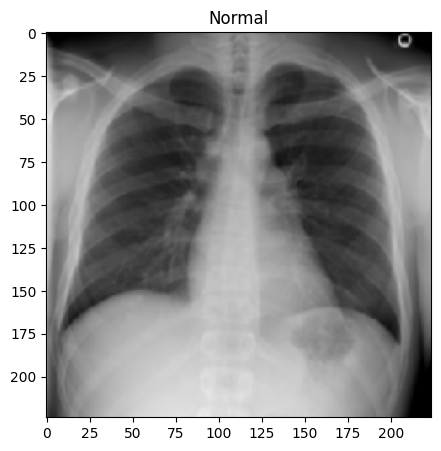

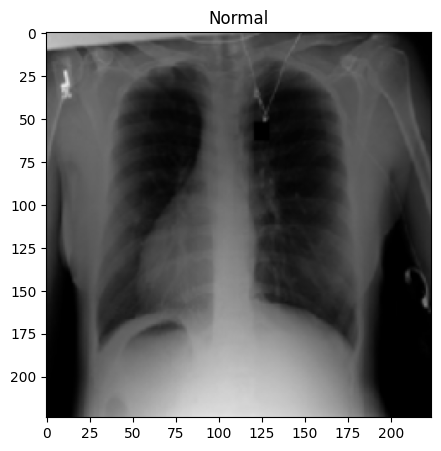

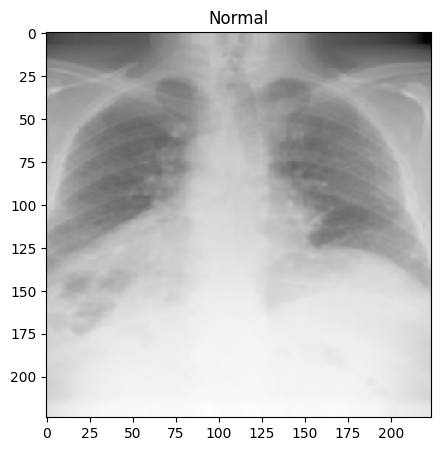

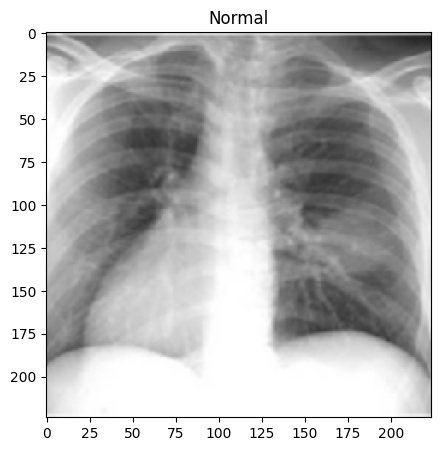

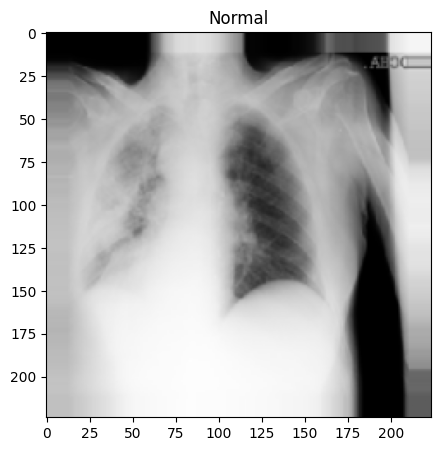

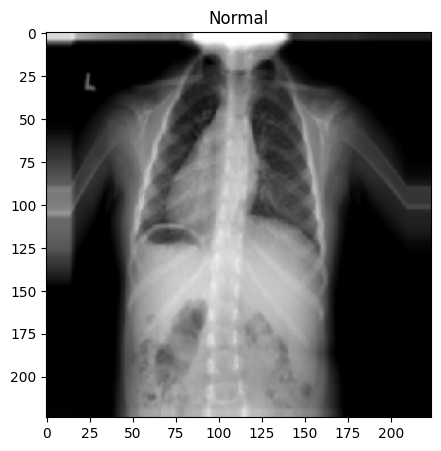

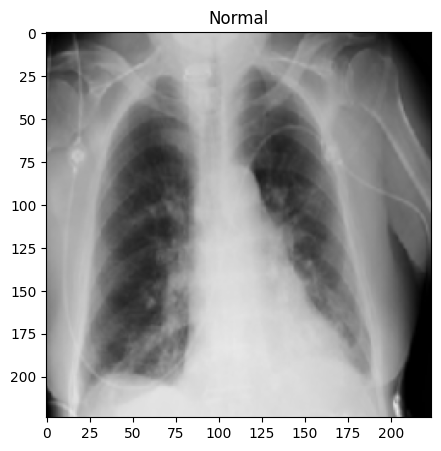

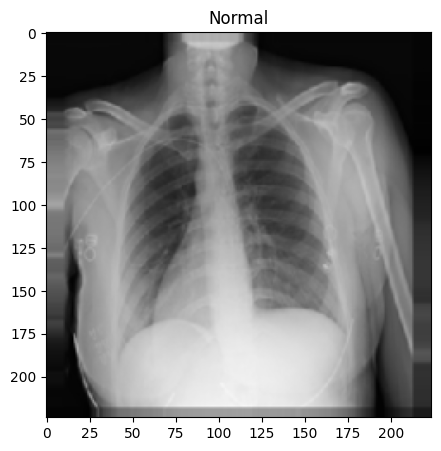

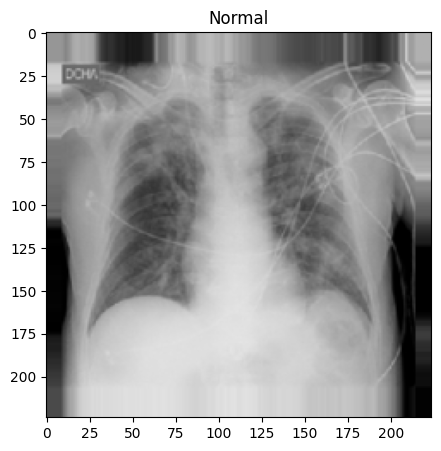

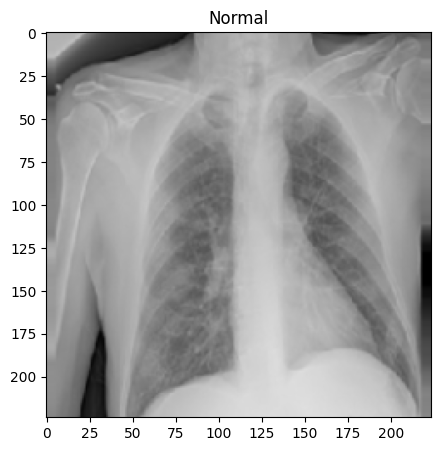

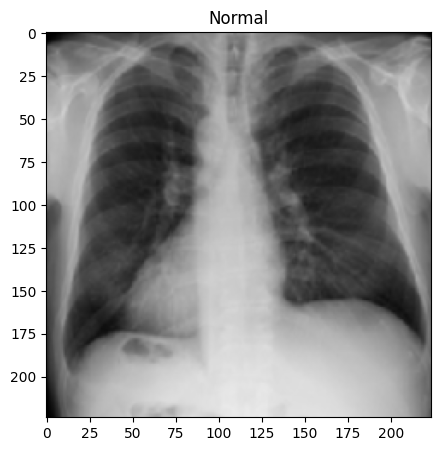

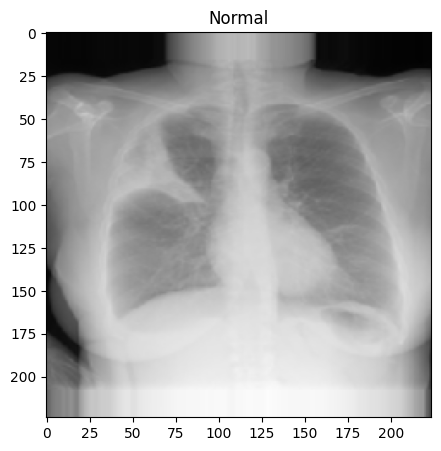

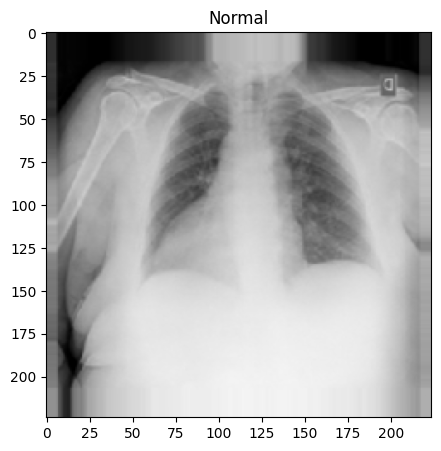

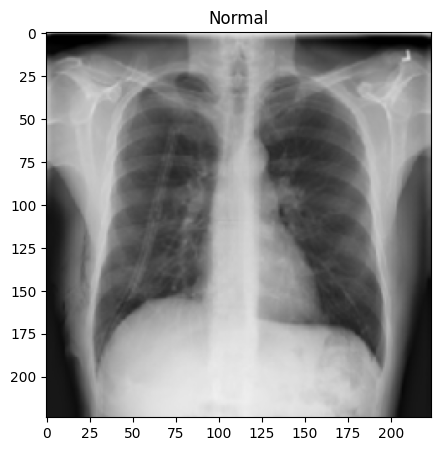

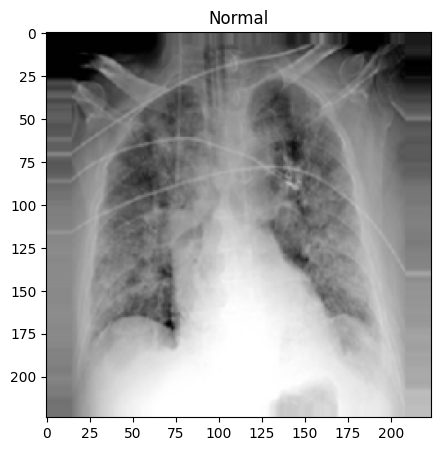

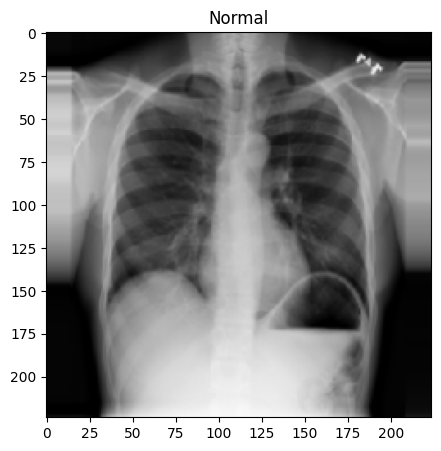

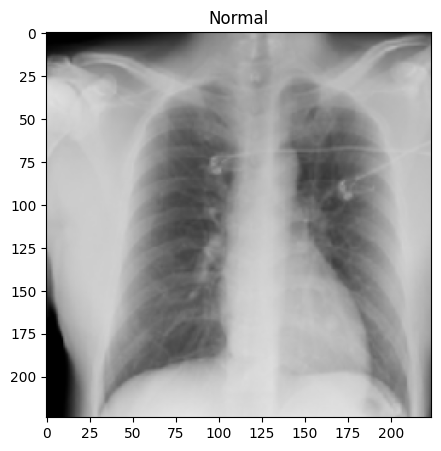

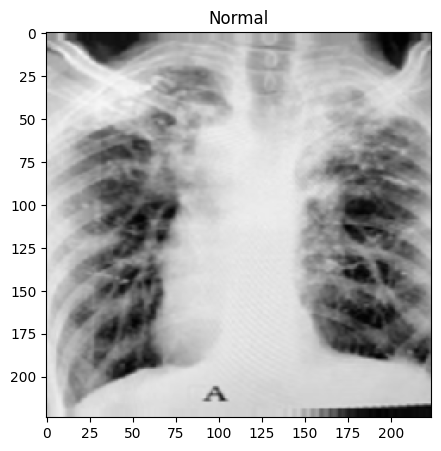

In [29]:
plotImage(t_img,label)

In [30]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten,Dense,Dropout,MaxPool2D

In [31]:
vgg=VGG16(input_shape=(224,224,3),include_top=False)

In [32]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [33]:
for layer in vgg.layers:
    layer.trainable=False

In [34]:
x=Flatten()(vgg.output)
x=Dense(units=1,activation='sigmoid',name='predictions')(x)
model=Model(vgg.input,x)

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [36]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only=True)

In [39]:
hist=model.fit(train,steps_per_epoch=32,epochs=30,validation_data=validation,verbose=1,validation_steps=32,callbacks=[es,mc])

Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.4580
Epoch 1: val_accuracy improved from -inf to 0.38119, saving model to bestmodel.h5
32/32 [==============================] - 102s 3s/step - loss: 0.0000e+00 - accuracy: 0.4580 - val_loss: 0.0000e+00 - val_accuracy: 0.3812
Epoch 2/30
32/32 [==============================] - 59s 2s/step - loss: 0.0000e+00 - accuracy: 0.4355
Epoch 3/30
32/32 [==============================] - 62s 2s/step - loss: 0.0000e+00 - accuracy: 0.4346
Epoch 4/30
32/32 [==============================] - 61s 2s/step - loss: 0.0000e+00 - accuracy: 0.4688
Epoch 5/30
32/32 [==============================] - 61s 2s/step - loss: 0.0000e+00 - accuracy: 0.4377
Epoch 6/30
32/32 [==============================] - 61s 2s/step - loss: 0.0000e+00 - accuracy: 0.4102
Epoch 7/30
32/32 [==============================] - 60s 2s/step - loss: 0.0000e+00 - accuracy: 0.4541
Epoch 8/30
32/32 [==============================] - 60s 2s/step - loss

In [47]:
acc=model.evaluate_generator(generator=test,steps=len(test),verbose=1)[1]
print(f"The accuracy is ={acc}%")

19/19 [==============================] - 34s 2s/step - loss: 0.0000e+00 - accuracy: 0.5000
The accuracy is =0.5%


In [48]:
from keras.preprocessing import image


def get_img_array(img_path):
    path=img_path
    img=image.load_img(path,target_size=(224,224,3))
    img=image.img_to_array(img)/255
    img=np.expand_dims(img,axis=0)
    return img

In [51]:
path=os.path.join(pwd,"dataset/all_images/COVID-1094.png").replace("\\", "/")
img=get_img_array(path)

res=class_type[int((model.predict(img)[0][0]>0.5))]
print(f"The xray image is type of {res}")

print(f"The chance of image is being normal of  ={model.predict(img)[0][0]*100}percent")

print(f"The chance of image is being Covid of  ={100-model.predict(img)[0][0]*100}percent")

1/1 [==============================] - 0s 97ms/step
The xray image is type of Covid
1/1 [==============================] - 0s 92ms/step
The chance of image is being normal of  =0.0percent
1/1 [==============================] - 0s 92ms/step
The chance of image is being Covid of  =100.0percent
